<a href="https://colab.research.google.com/github/RFankhauser/MSc_WI_BINA/blob/main/Datenanalyse_Test_Salome_V2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import gdown

# Die Datei-ID aus dem Google Drive-Link
file_id = '1VB_9wbmdneUo32XGGDNULnUZje4HsX8Q'
destination = '/content/deine_datei.csv'

# Datei herunterladen
gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1VB_9wbmdneUo32XGGDNULnUZje4HsX8Q
From (redirected): https://drive.google.com/uc?id=1VB_9wbmdneUo32XGGDNULnUZje4HsX8Q&confirm=t&uuid=5151c82d-1a0e-40af-9f05-a3b571353024
To: /content/deine_datei.csv
100%|██████████| 1.90G/1.90G [00:24<00:00, 77.5MB/s]


'/content/deine_datei.csv'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [ ]:
# Lade die heruntergeladene CSV-Datei
df = pd.read_csv('/content/deine_datei.csv')

# Zeige die ersten paar Zeilen der Datei an
print(df.head(10))

   LINIEN_TEXT            HALTESTELLEN_NAME         ABFAHRTSZEIT  \
0           10           Zürich, Salersteig  2024-01-01 04:36:00   
1           10         Zürich, Berninaplatz  2024-01-01 04:37:00   
2           10  Zürich, Hirschwiesenstrasse  2024-01-01 04:38:00   
3           10            Zürich, Milchbuck  2024-01-01 04:40:00   
4           10   Zürich, Universität Irchel  2024-01-01 04:41:00   
5           10     Zürich, Langmauerstrasse  2024-01-01 04:42:00   
6           10         Zürich, Letzistrasse  2024-01-01 04:43:00   
7           10     Zürich, Sternen Oerlikon  2024-01-01 04:44:00   
8           10        Zürich, Kinkelstrasse  2024-01-01 04:44:00   
9           10   Zürich, Seilbahn Rigiblick  2024-01-01 04:45:00   

           AB_PROGNOSE AB_PROGNOSE_STATUS  VERSPAETUNG [s] STATION  \
0  2024-01-01 04:37:09               REAL             69.0  NABZUE   
1  2024-01-01 04:38:08               REAL             68.0  NABZUE   
2  2024-01-01 04:39:12               REAL

In [ ]:
# Anzeigen der ersten 5 Zeilen des DataFrames
display(df.head(5))

,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,VERSPAETUNG [s],STATION,BOEENSPITZE_[kmh],GLOBALSTRAHLUNG [Wm2],TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh],NEUSCHNEEHOEHE [cm],SCHNEHOEHE_MORGENMESSUNG_6_UTC [cm],TAG_MIT_HAGEL,TAG_MIT_NEBEL,TEMPERATUR_GLATT,GPS_LATITUDE,GPS_LONGITUDE
0,10,"Zürich, Salersteig",2024-01-01 04:36:00,2024-01-01 04:37:09,REAL,69.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,47.406052,8.548386
1,10,"Zürich, Berninaplatz",2024-01-01 04:37:00,2024-01-01 04:38:08,REAL,68.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,47.403601,8.547871
2,10,"Zürich, Hirschwiesenstrasse",2024-01-01 04:38:00,2024-01-01 04:39:12,REAL,72.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,47.400376,8.543683
3,10,"Zürich, Milchbuck",2024-01-01 04:40:00,2024-01-01 04:42:18,REAL,138.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,47.398125,8.542047
4,10,"Zürich, Universität Irchel",2024-01-01 04:41:00,2024-01-01 04:44:07,REAL,187.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,47.396090,8.545105


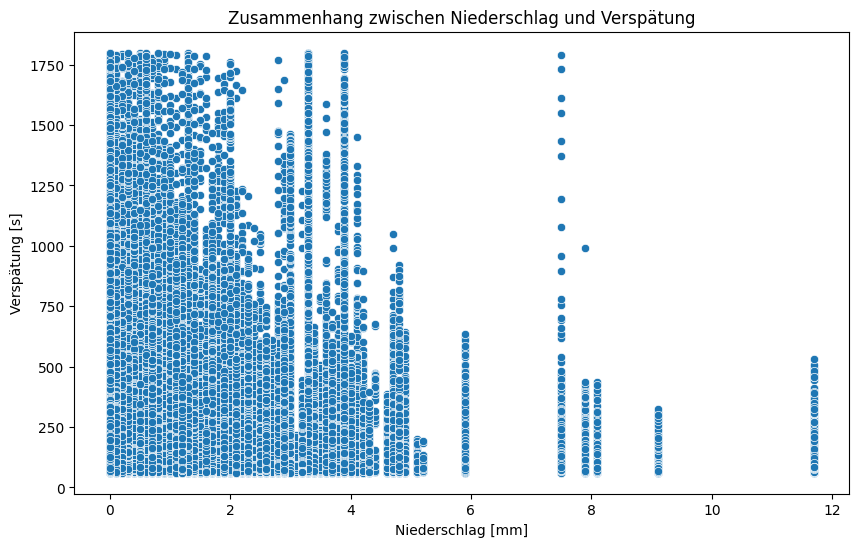

In [ ]:
# Erstelle das Streudiagramm
plt.figure(figsize=(10,6))  # Optional: Bildgröße anpassen
sns.scatterplot(data=df, x='NIEDERSCHLAG [mm]', y='VERSPAETUNG [s]')

# Achsenbeschriftungen hinzufügen
plt.title('Zusammenhang zwischen Niederschlag und Verspätung')
plt.xlabel('Niederschlag [mm]')
plt.ylabel('Verspätung [s]')

# Zeige die Grafik an
plt.show()

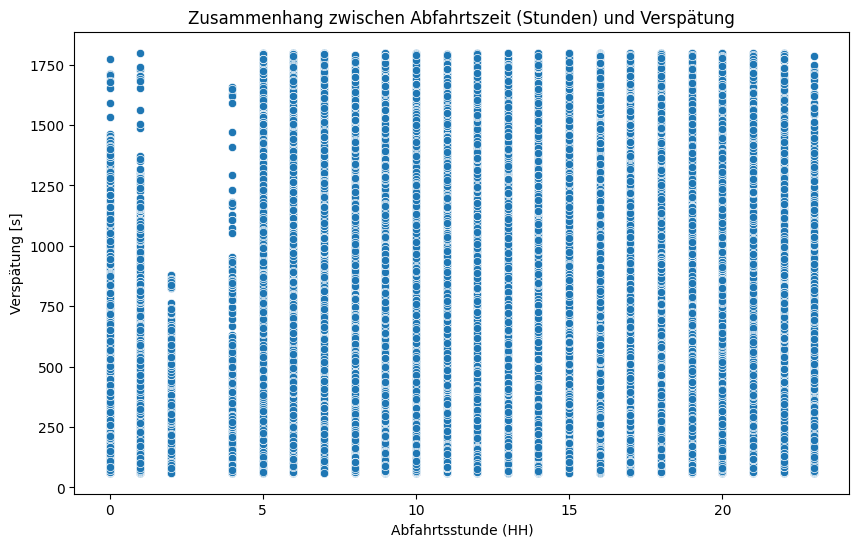

In [ ]:
# Wandelt "ABFAHRTSZEIT" in das datetime-Format um
df['ABFAHRTSZEIT'] = pd.to_datetime(df['ABFAHRTSZEIT'])

# Extrahiere die Stunde und die Minute der Abfahrtszeit
df['Abfahrtsstunde'] = df['ABFAHRTSZEIT'].dt.hour
df['Abfahrtsminute'] = df['ABFAHRTSZEIT'].dt.minute

# Erstelle das Streudiagramm, das die Abfahrtsstunde auf der x-Achse und die Verspätung auf der y-Achse zeigt
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Abfahrtsstunde', y='VERSPAETUNG [s]')

# Achsenbeschriftungen hinzufügen
plt.title('Zusammenhang zwischen Abfahrtszeit (Stunden) und Verspätung')
plt.xlabel('Abfahrtsstunde (HH)')
plt.ylabel('Verspätung [s]')

# Zeige die Grafik an
plt.show()

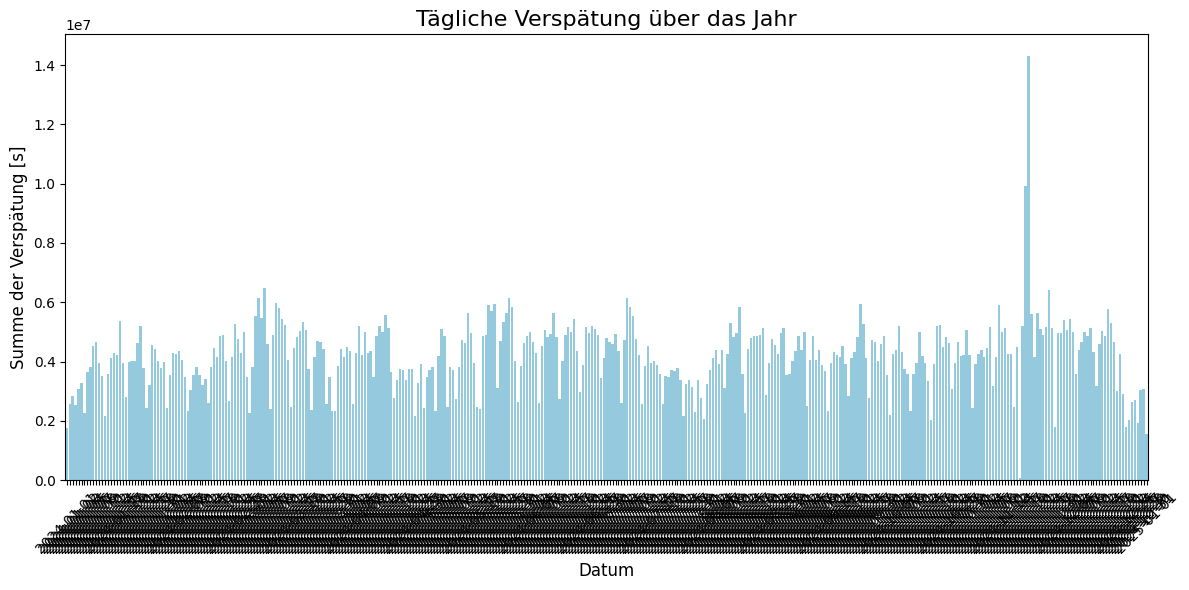

In [ ]:
# Wandelt "ABFAHRTSZEIT" in das datetime-Format um
df['ABFAHRTSZEIT'] = pd.to_datetime(df['ABFAHRTSZEIT'])

# Extrahiere nur das Datum aus der Abfahrtszeit (ohne Uhrzeit)
df['Abfahrtsdatum'] = df['ABFAHRTSZEIT'].dt.date

# Gruppiere nach dem Datum und berechne die Summe der Verspätung pro Tag
daily_delays = df.groupby('Abfahrtsdatum')['VERSPAETUNG [s]'].sum()

# Erstelle eine Säulengrafik, die die Verspätung pro Tag zeigt
plt.figure(figsize=(12,6))
sns.barplot(x=daily_delays.index, y=daily_delays.values, color='skyblue')

# Achsenbeschriftungen und Titel hinzufügen
plt.title('Tägliche Verspätung über das Jahr', fontsize=16)
plt.xlabel('Datum', fontsize=12)
plt.ylabel('Summe der Verspätung [s]', fontsize=12)

# Drehe die X-Achsen-Beschriftungen, um sie besser lesbar zu machen
plt.xticks(rotation=45)

# Zeige die Grafik an
plt.tight_layout()
plt.show()

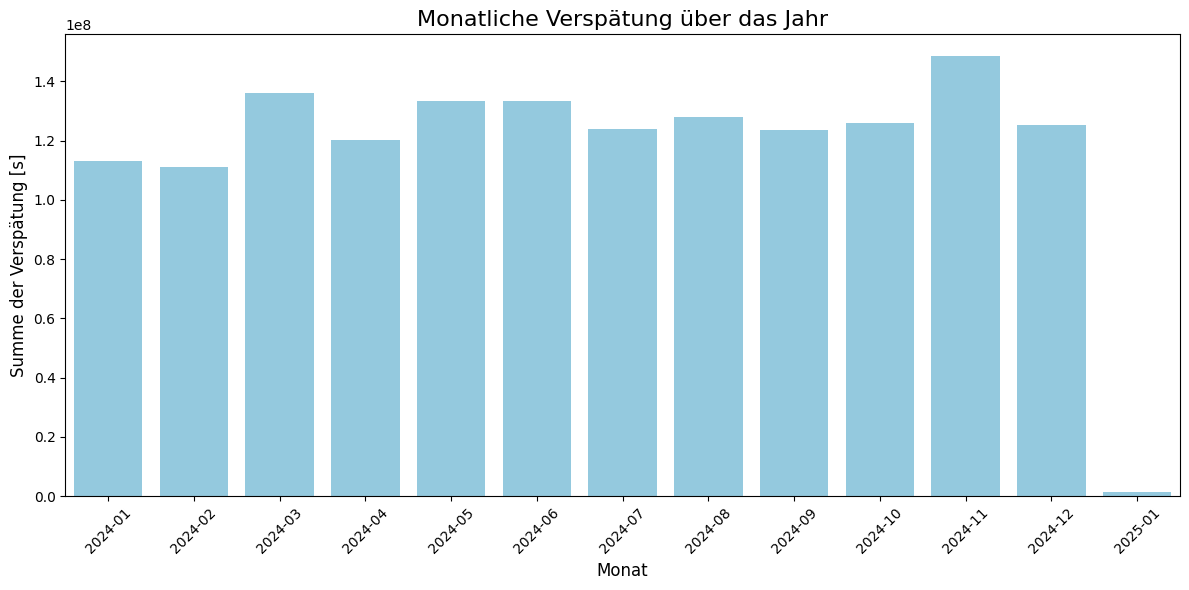

In [ ]:
# Wandelt "ABFAHRTSZEIT" in das datetime-Format um
df['ABFAHRTSZEIT'] = pd.to_datetime(df['ABFAHRTSZEIT'])

# Extrahiere Jahr und Monat aus der Abfahrtszeit
df['Abfahrtsmonat'] = df['ABFAHRTSZEIT'].dt.to_period('M')

# Gruppiere nach Monat und Jahr und berechne die Summe der Verspätung pro Monat
monthly_delays = df.groupby('Abfahrtsmonat')['VERSPAETUNG [s]'].sum()

# Erstelle eine Säulengrafik für monatliche Verspätung
plt.figure(figsize=(12,6))
sns.barplot(x=monthly_delays.index.astype(str), y=monthly_delays.values, color='skyblue')

# Achsenbeschriftungen und Titel hinzufügen
plt.title('Monatliche Verspätung über das Jahr', fontsize=16)
plt.xlabel('Monat', fontsize=12)
plt.ylabel('Summe der Verspätung [s]', fontsize=12)

# Drehe die X-Achsen-Beschriftungen, um sie besser lesbar zu machen
plt.xticks(rotation=45)

# Zeige die Grafik an
plt.tight_layout()
plt.show()

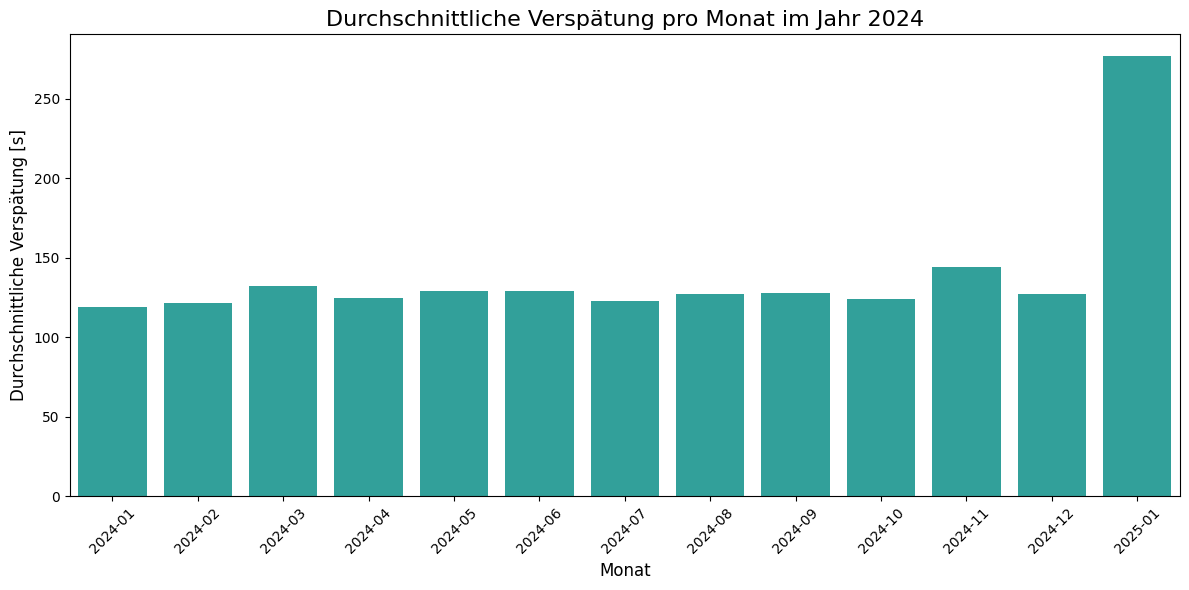

In [ ]:
# Wandelt "ABFAHRTSZEIT" in das datetime-Format um
df['ABFAHRTSZEIT'] = pd.to_datetime(df['ABFAHRTSZEIT'])

# Extrahiere Jahr und Monat aus der Abfahrtszeit
df['Abfahrtsmonat'] = df['ABFAHRTSZEIT'].dt.to_period('M')  # Monat und Jahr als Perioden

# Gruppiere nach Monat und Jahr und berechne die durchschnittliche Verspätung pro Monat
monthly_delays_avg = df.groupby('Abfahrtsmonat')['VERSPAETUNG [s]'].mean()

# Erstelle eine Säulengrafik für die durchschnittliche Verspätung pro Monat
plt.figure(figsize=(12,6))
sns.barplot(x=monthly_delays_avg.index.astype(str), y=monthly_delays_avg.values, color='lightseagreen')

# Achsenbeschriftungen und Titel hinzufügen
plt.title('Durchschnittliche Verspätung pro Monat im Jahr 2024', fontsize=16)
plt.xlabel('Monat', fontsize=12)
plt.ylabel('Durchschnittliche Verspätung [s]', fontsize=12)

# Drehe die X-Achsen-Beschriftungen, um sie besser lesbar zu machen
plt.xticks(rotation=45)

# Zeige die Grafik an
plt.tight_layout()
plt.show()

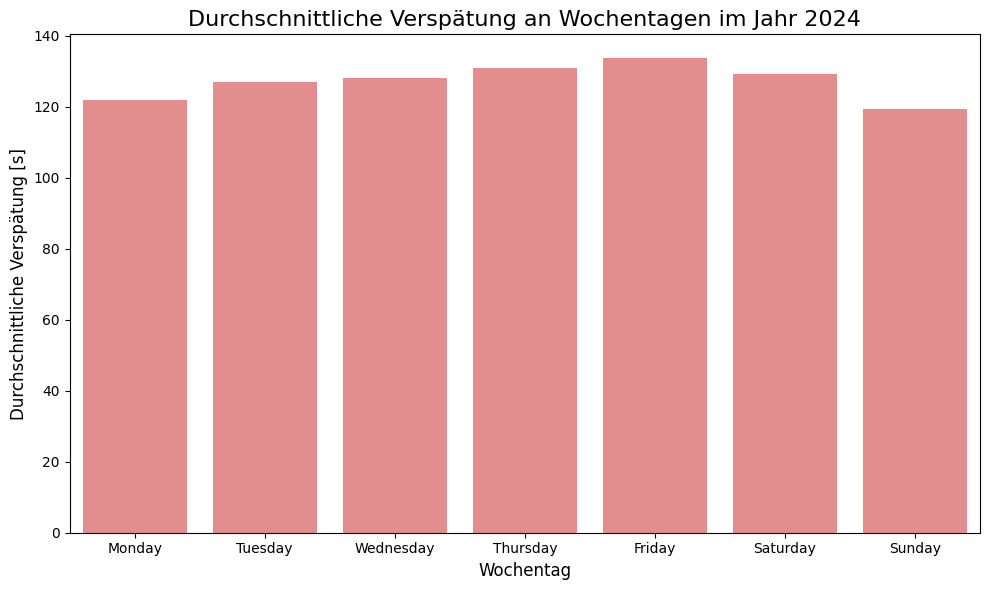

In [ ]:
# Wandelt "ABFAHRTSZEIT" in das datetime-Format um
df['ABFAHRTSZEIT'] = pd.to_datetime(df['ABFAHRTSZEIT'])

# Extrahiere den Wochentag als String (Montag, Dienstag, ...)
df['Wochentag'] = df['ABFAHRTSZEIT'].dt.strftime('%A')  # %A gibt den vollständigen Wochentagsnamen zurück

# Gruppiere nach Wochentag und berechne die durchschnittliche Verspätung pro Wochentag
weekday_delays_avg = df.groupby('Wochentag')['VERSPAETUNG [s]'].mean()

# Sortiere die Wochentage gemäß der Reihenfolge von Montag bis Sonntag
wochentage_sort = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_delays_avg = weekday_delays_avg[wochentage_sort]

# Erstelle eine Säulengrafik für die durchschnittliche Verspätung an Wochentagen
plt.figure(figsize=(10,6))
sns.barplot(x=weekday_delays_avg.index, y=weekday_delays_avg.values, color='lightcoral')

# Achsenbeschriftungen und Titel hinzufügen
plt.title('Durchschnittliche Verspätung an Wochentagen im Jahr 2024', fontsize=16)
plt.xlabel('Wochentag', fontsize=12)
plt.ylabel('Durchschnittliche Verspätung [s]', fontsize=12)

# Zeige die Grafik an
plt.tight_layout()
plt.show()

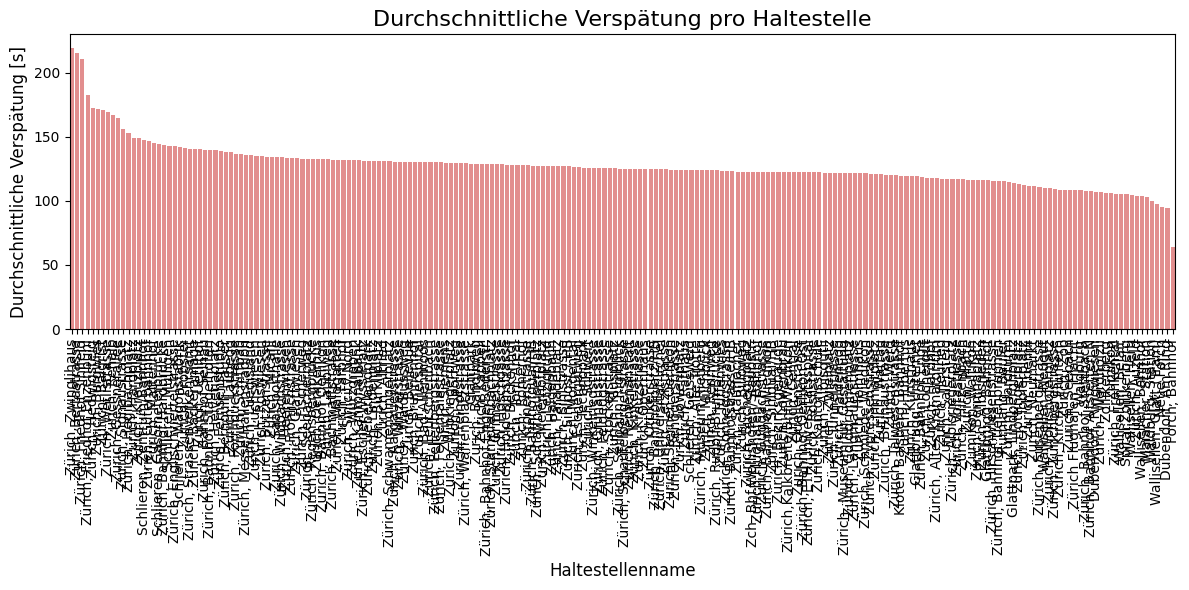

In [ ]:
# Gruppiere nach Haltestellen und berechne die durchschnittliche Verspätung pro Haltestelle
halt_delays_avg = df.groupby('HALTESTELLEN_NAME')['VERSPAETUNG [s]'].mean().sort_values(ascending=False)

# Erstelle eine Säulengrafik für die durchschnittliche Verspätung pro Haltestelle
plt.figure(figsize=(12,6))
sns.barplot(x=halt_delays_avg.index, y=halt_delays_avg.values, color='lightcoral')

# Achsenbeschriftungen und Titel hinzufügen
plt.title('Durchschnittliche Verspätung pro Haltestelle', fontsize=16)
plt.xlabel('Haltestellenname', fontsize=12)
plt.ylabel('Durchschnittliche Verspätung [s]', fontsize=12)

# Drehe die X-Achsen-Beschriftungen, um sie besser lesbar zu machen
plt.xticks(rotation=90)

# Zeige die Grafik an
plt.tight_layout()
plt.show()

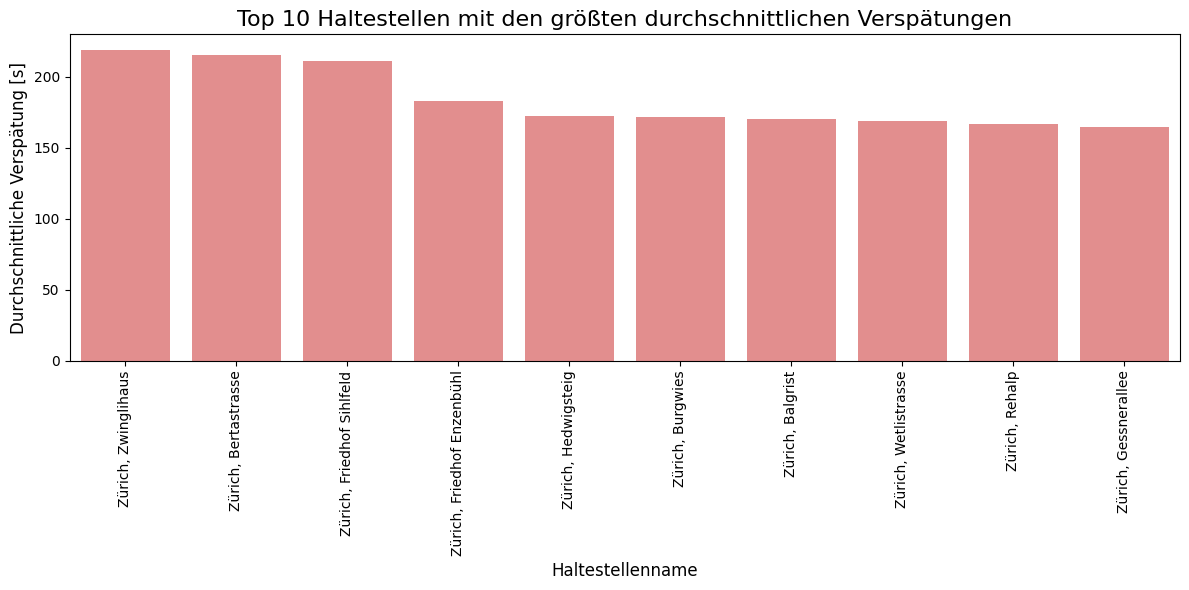

In [ ]:
# Gruppiere nach Haltestellen und berechne die durchschnittliche Verspätung pro Haltestelle
halt_delays_avg = df.groupby('HALTESTELLEN_NAME')['VERSPAETUNG [s]'].mean()

# Zeige nur die 10 Haltestellen mit der größten durchschnittlichen Verspätung
halt_delays_top10 = halt_delays_avg.nlargest(10)

# Erstelle eine Säulengrafik für die 10 Haltestellen mit den größten durchschnittlichen Verspätungen
plt.figure(figsize=(12,6))
sns.barplot(x=halt_delays_top10.index, y=halt_delays_top10.values, color='lightcoral')

# Achsenbeschriftungen und Titel hinzufügen
plt.title('Top 10 Haltestellen mit den größten durchschnittlichen Verspätungen', fontsize=16)
plt.xlabel('Haltestellenname', fontsize=12)
plt.ylabel('Durchschnittliche Verspätung [s]', fontsize=12)

# Drehe die X-Achsen-Beschriftungen, um sie besser lesbar zu machen
plt.xticks(rotation=90)

# Zeige die Grafik an
plt.tight_layout()
plt.show()

<ipython-input-22-279488a03262>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_januar['Tag'] = df_januar['ABFAHRTSZEIT'].dt.day


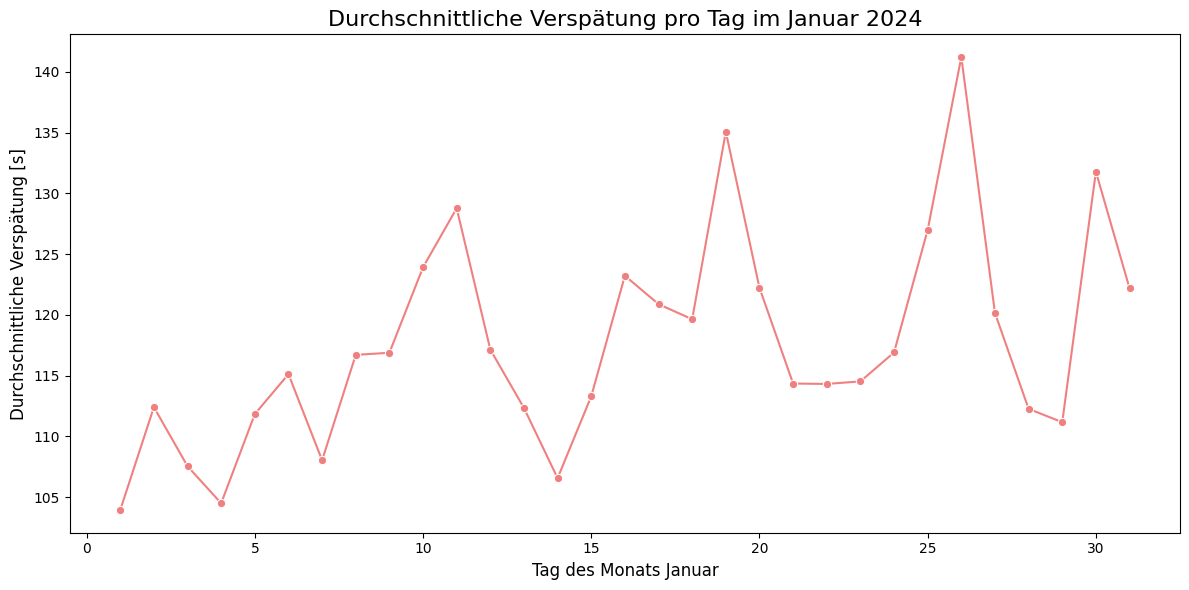

In [ ]:
# Wandelt "ABFAHRTSZEIT" in das datetime-Format um
df['ABFAHRTSZEIT'] = pd.to_datetime(df['ABFAHRTSZEIT'])

# Filtern der Daten für Januar 2024
df_januar = df[df['ABFAHRTSZEIT'].dt.month == 1]
df_januar = df_januar[df_januar['ABFAHRTSZEIT'].dt.year == 2024]

# Extrahiere den Tag des Monats aus der Abfahrtszeit
df_januar['Tag'] = df_januar['ABFAHRTSZEIT'].dt.day

# Gruppiere nach Tag und berechne die durchschnittliche Verspätung pro Tag
daily_delays_avg = df_januar.groupby('Tag')['VERSPAETUNG [s]'].mean()

# Erstelle eine Linie/Grafik für die durchschnittliche Verspätung pro Tag im Januar
plt.figure(figsize=(12,6))
sns.lineplot(x=daily_delays_avg.index, y=daily_delays_avg.values, marker='o', color='lightcoral')

# Achsenbeschriftungen und Titel hinzufügen
plt.title('Durchschnittliche Verspätung pro Tag im Januar 2024', fontsize=16)
plt.xlabel('Tag des Monats Januar', fontsize=12)
plt.ylabel('Durchschnittliche Verspätung [s]', fontsize=12)

# Zeige die Grafik an
plt.tight_layout()
plt.show()

<ipython-input-23-893da9ee54cf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_januar['Tag'] = df_januar['ABFAHRTSZEIT'].dt.day


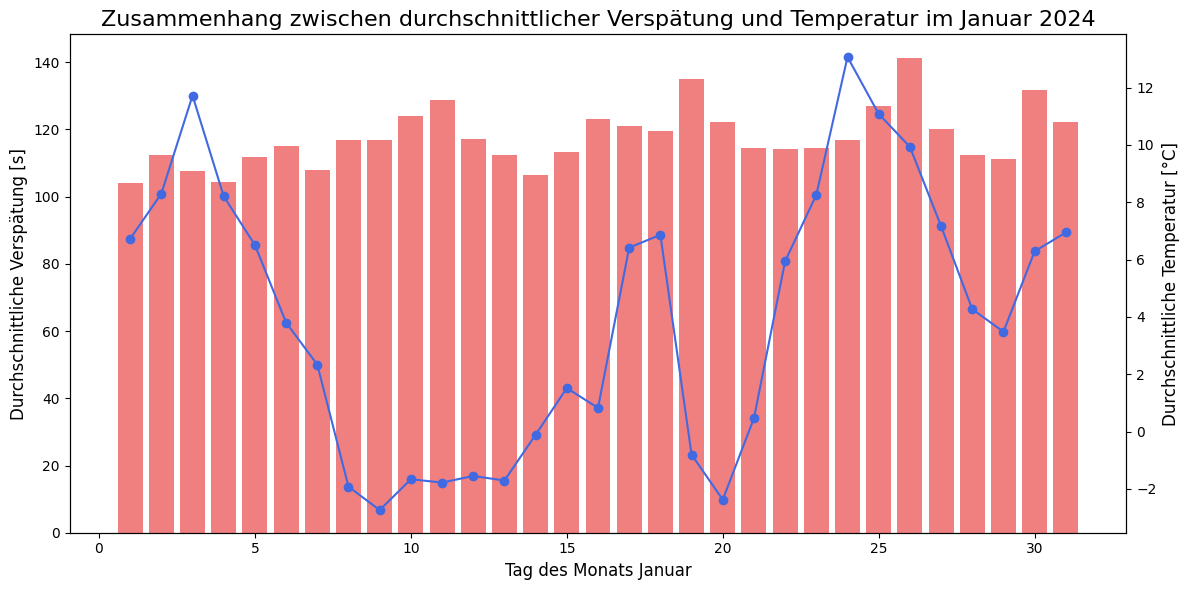

In [ ]:
# Wandelt "ABFAHRTSZEIT" in das datetime-Format um
df['ABFAHRTSZEIT'] = pd.to_datetime(df['ABFAHRTSZEIT'])

# Filtern der Daten für Januar 2024
df_januar = df[df['ABFAHRTSZEIT'].dt.month == 1]
df_januar = df_januar[df_januar['ABFAHRTSZEIT'].dt.year == 2024]

# Extrahiere den Tag des Monats aus der Abfahrtszeit
df_januar['Tag'] = df_januar['ABFAHRTSZEIT'].dt.day

# Gruppiere nach Tag und berechne die durchschnittliche Verspätung und Temperatur pro Tag
daily_delays_avg = df_januar.groupby('Tag')['VERSPAETUNG [s]'].mean()
daily_temp_avg = df_januar.groupby('Tag')['TEMPERATUR [°C]'].mean()

# Erstelle das Diagramm
fig, ax1 = plt.subplots(figsize=(12,6))

# Säulendiagramm für die durchschnittliche Verspätung
ax1.bar(daily_delays_avg.index, daily_delays_avg.values, color='lightcoral', label='Durchschnittliche Verspätung [s]')
ax1.set_xlabel('Tag des Monats Januar', fontsize=12)
ax1.set_ylabel('Durchschnittliche Verspätung [s]', fontsize=12)
ax1.set_title('Zusammenhang zwischen durchschnittlicher Verspätung und Temperatur im Januar 2024', fontsize=16)

# Zweite Y-Achse für die Temperatur
ax2 = ax1.twinx()
ax2.plot(daily_temp_avg.index, daily_temp_avg.values, color='royalblue', marker='o', label='Durchschnittliche Temperatur [°C]')
ax2.set_ylabel('Durchschnittliche Temperatur [°C]', fontsize=12)

# Zeige das Diagramm
plt.tight_layout()
plt.show()

In [ ]:
# Lade die heruntergeladene CSV-Datei
df = pd.read_csv('/content/sample_data/Datensatz_komplett.csv')

# Zeige die ersten paar Zeilen der Datei an
print(df.head(10))

   LINIEN_TEXT            HALTESTELLEN_NAME         ABFAHRTSZEIT  \
0           10           Zürich, Salersteig  2024-01-01 04:36:00   
1           10         Zürich, Berninaplatz  2024-01-01 04:37:00   
2           10  Zürich, Hirschwiesenstrasse  2024-01-01 04:38:00   
3           10            Zürich, Milchbuck  2024-01-01 04:40:00   
4           10   Zürich, Universität Irchel  2024-01-01 04:41:00   
5           10     Zürich, Langmauerstrasse  2024-01-01 04:42:00   
6           10         Zürich, Letzistrasse  2024-01-01 04:43:00   
7           10        Zürich, Kinkelstrasse  2024-01-01 04:44:00   
8           10     Zürich, Sternen Oerlikon  2024-01-01 04:44:00   
9           12                    Glattpark  2024-01-01 04:45:00   

           AB_PROGNOSE AB_PROGNOSE_STATUS  VERSPAETUNG [s] WETTERSTATION  \
0  2024-01-01 04:37:09               REAL             69.0        NABZUE   
1  2024-01-01 04:38:08               REAL             68.0        NABZUE   
2  2024-01-01 04:39:12 

In [ ]:
from scipy.stats import pearsonr

In [ ]:
# Anzeigen der ersten 5 Zeilen des DataFrames
display(df.head(5))

,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,VERSPAETUNG [s],WETTERSTATION,BOEENSPITZE [kmh],GLOBALSTRAHLUNG [Wm2],TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh],NEUSCHNEEHOEHE [cm],SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm],TAG_MIT_HAGEL,TAG_MIT_NEBEL,GPS_LATITUDE,GPS_LONGITUDE
0,10,"Zürich, Salersteig",2024-01-01 04:36:00,2024-01-01 04:37:09,REAL,69.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.406052,8.548386
1,10,"Zürich, Berninaplatz",2024-01-01 04:37:00,2024-01-01 04:38:08,REAL,68.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.403601,8.547871
2,10,"Zürich, Hirschwiesenstrasse",2024-01-01 04:38:00,2024-01-01 04:39:12,REAL,72.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.400376,8.543683
3,10,"Zürich, Milchbuck",2024-01-01 04:40:00,2024-01-01 04:42:18,REAL,138.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.398125,8.542047
4,10,"Zürich, Universität Irchel",2024-01-01 04:41:00,2024-01-01 04:44:07,REAL,187.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.396090,8.545105


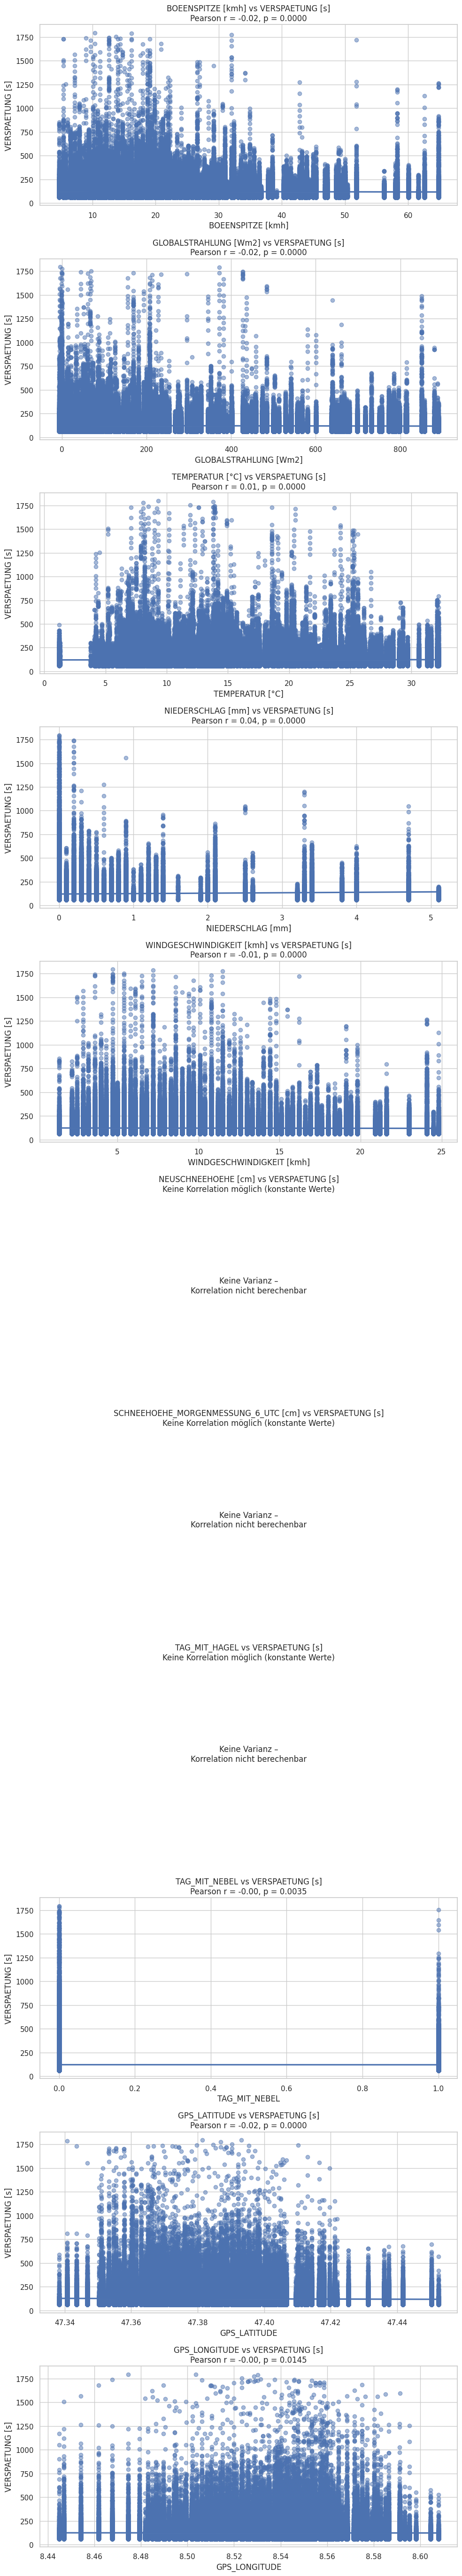

In [ ]:
# Liste der interessierenden Spalten
variablen = [
    'BOEENSPITZE [kmh]',
    'GLOBALSTRAHLUNG [Wm2]',
    'TEMPERATUR [°C]',
    'NIEDERSCHLAG [mm]',
    'WINDGESCHWINDIGKEIT [kmh]',
    'NEUSCHNEEHOEHE [cm]',
    'SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]',
    'TAG_MIT_HAGEL',
    'TAG_MIT_NEBEL',
    'GPS_LATITUDE',
    'GPS_LONGITUDE'
]

zielvariable = 'VERSPAETUNG [s]'

# Plot-Einstellungen
sns.set(style='whitegrid')
plt.figure(figsize=(10, len(variablen)*5))

# Für jede Variable eine Grafik und Korrelation berechnen
for idx, variable in enumerate(variablen):
    plt.subplot(len(variablen), 1, idx+1)

    temp_df = df[[variable, zielvariable]].dropna()

    # Prüfen, ob eine der Spalten konstant ist
    if temp_df[variable].nunique() <= 1 or temp_df[zielvariable].nunique() <= 1:
        plt.text(0.5, 0.5, 'Keine Varianz –\nKorrelation nicht berechenbar',
                 ha='center', va='center', fontsize=12)
        plt.title(f'{variable} vs {zielvariable}\nKeine Korrelation möglich (konstante Werte)')
        plt.axis('off')
        continue

    # Korrelationskoeffizient und p-Wert berechnen
    r, p = pearsonr(temp_df[variable], temp_df[zielvariable])

    # Plot
    sns.regplot(x=variable, y=zielvariable, data=temp_df, scatter_kws={'alpha':0.5})
    plt.title(f'{variable} vs {zielvariable}\nPearson r = {r:.2f}, p = {p:.4f}')
    plt.xlabel(variable)
    plt.ylabel(zielvariable)

plt.tight_layout()
plt.show()

r-Wert Bedeutung
+1:	perfekte positive Korrelation
0 bis +0.3:	schwache positive Korrelation
+0.3 bis +0.7:	mittlere positive Korrelation
+0.7 bis +1:	starke positive Korrelation
0:	keine Korrelation
-0.3 bis 0:	schwache negative Korrelation
-0.7 bis -0.3:	mittlere negative Korrelation
-1:	perfekte negative Korrelation

p-Wert	Bedeutung
p < 0.05	Korrelation ist statistisch signifikant
p ≥ 0.05	Korrelation kann zufällig sein
